## Logistic Regression Model

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Loading Data
df = pd.read_csv("Classification_train.csv")

In [3]:
# Shuffle the dataframe values
np.random.seed(42)
df_shuffled = df.sample(frac=1).reset_index(drop=True)
df_values = df_shuffled.values

In [4]:
# Split the data into features and target variables:
features = df_values[:, 1:]
target = df_values[:, 0].reshape(-1,1)

In [5]:
m = target.size
n = len(np.unique(target))

In [6]:
# Normalize the features:
def min_max_normalization(X):
    min_val = np.min(X, axis=0)
    max_val = np.max(X)
    normalized_X = (X - min_val) / (max_val - min_val)
    return normalized_X

X = min_max_normalization(features)

In [7]:
# Add column of ones for bias term
ones_column = np.ones((X.shape[0], 1))
X = np.concatenate((ones_column, X), axis=1)

In [8]:
y = np.zeros((m,n))
for i in range (n):
    for j in range (m):
        if target[j]==i:
            y[j,i]=1

In [9]:
# Cross-validation sets (80:20 split)
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
y_train, y_val = y[:train_size], y[train_size:]

In [10]:
# Softmax function
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

In [11]:
# Sigmoid Function
# def sigmoid(x):
#     fxn = 1/(1 + np.exp(-x))
#     return fxn

In [12]:
def logistic_regression(X, y, alpha, itr, lambd):
    m = len(X)
    theta = np.zeros((X.shape[1], n))
    cost_list = []
    for i in range(itr):
        z = np.dot(X, theta)
        prob = softmax(z)
        reg = (lambd / (2 * m)) * np.sum(theta**2)
        # prob = sigmoid(z)

        # Cost Calculation
        cost = (-1 / m) * np.sum(y * np.log(prob)) + reg
        cost_list.append(cost)

        # Gradient Descent
        gradient = -1 / m * np.dot(X.T, (y - prob)) + (lambd / m) * theta
        theta = theta - alpha * gradient

        if (i+1) % 100 == 0 or i==0:
            print(f'Itr {i+1}, Cost: {cost}')

    return theta, cost_list

In [13]:
iteration = 2100
learning_rate = 1.5
lambd = 100
theta, cost_list = logistic_regression(X_train, y_train, alpha = learning_rate, itr =iteration, lambd=lambd)

Itr 1, Cost: 2.302585092994046
Itr 100, Cost: 0.32489616056357845
Itr 200, Cost: 0.32184358376183014
Itr 300, Cost: 0.32150339122752347
Itr 400, Cost: 0.3214468305570319
Itr 500, Cost: 0.32143582332036574
Itr 600, Cost: 0.3214334960490206
Itr 700, Cost: 0.32143297761318884
Itr 800, Cost: 0.3214328577966362
Itr 900, Cost: 0.32143282932800177
Itr 1000, Cost: 0.3214328224152748
Itr 1100, Cost: 0.32143282070712015
Itr 1200, Cost: 0.3214328202789334
Itr 1300, Cost: 0.3214328201703115
Itr 1400, Cost: 0.32143282014247887
Itr 1500, Cost: 0.32143282013528635
Itr 1600, Cost: 0.321432820133414
Itr 1700, Cost: 0.3214328201329235
Itr 1800, Cost: 0.32143282013279434
Itr 1900, Cost: 0.32143282013276014
Itr 2000, Cost: 0.3214328201327511
Itr 2100, Cost: 0.32143282013274865


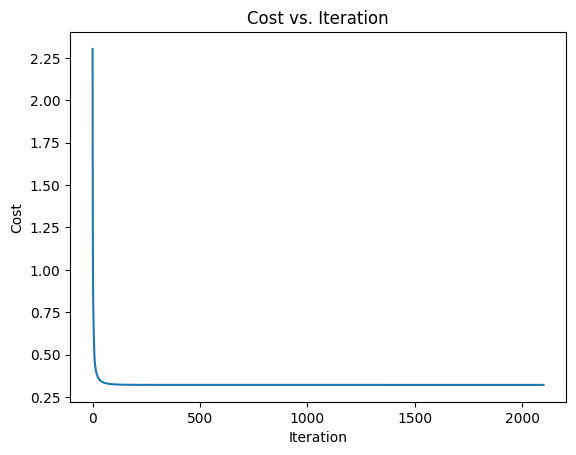

In [14]:
# Graph: Cost vs Iteration
plt.plot(range(iteration), cost_list)
plt.title('Cost vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [15]:
y_train_pred = softmax(np.dot(X_val,theta))
predictions = np.argmax(y_train_pred, axis=1)

accuracy = np.mean(predictions == np.argmax(y_val, axis=1))
print(f"Accuracy: {accuracy:.2%}")

Accuracy: 95.82%


In [16]:
# Loading Test data
test = pd.read_csv("Classification_test.csv")

# Extracting features and target variable
test=test.values
X_test = test[:, 1:]

# Normalisation
X_test = min_max_normalization(X_test)
ones_column = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((ones_column, X_test), axis=1)

In [42]:
# Predicting Values on Test Data
pred = softmax(np.dot(X_test,theta))
y_pred =  np.argmax(pred, axis=1)
y_pred.reshape(-1,1)

array([[0],
       [4],
       [5],
       ...,
       [0],
       [8],
       [2]], dtype=int64)

In [41]:
column_names = ['target'] + [f'features_{i}' for i in range(1,785)]
Result = pd.DataFrame(data=np.column_stack([y_pred, test[:, 1:]]), columns=column_names)
Result
# file_path = "Logistic_output.csv"
# Result.to_csv(file_path, index=False)

,target,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_775,features_776,features_777,features_778,features_779,features_780,features_781,features_782,features_783,features_784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
